In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix

file_path = 'data/UCI_Credit_Card.xls'
df = pd.read_excel(file_path)

In [24]:
print("\nData types and missing values:")
print(df.info())



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   3

In [25]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std     

In [26]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [27]:
print(f"\nNumber of duplicates: {df.duplicated().sum()}")


Number of duplicates: 0


In [28]:
counts = df['default payment next month'].value_counts()

print("Counts of each class:")
print(counts)

Counts of each class:
default payment next month
0    23364
1     6636
Name: count, dtype: int64


In [29]:
if 'ID' in df.columns:
    df.drop('ID', axis=1, inplace=True)
TARGET_COLUMN = 'default payment next month'

# Remap EDUCATION and MARRIAGE
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 3})

print("\nApplying One-Hot Encoding to categorical features...")


Applying One-Hot Encoding to categorical features...


In [30]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

for col in categorical_features:
    if col not in df.columns:
        print(f"Warning: Categorical column '{col}' not found. Skipping One-Hot Encoding for this column.")
        categorical_features.remove(col)

if categorical_features:
    df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
    print(f"One-Hot Encoded columns: {categorical_features}")
else:
    print("No specific categorical columns identified for One-Hot Encoding.")

One-Hot Encoded columns: ['SEX', 'EDUCATION', 'MARRIAGE']


In [31]:
print("\nDataset Info after Feature Engineering (One-Hot Encoding):")
df.info()



Dataset Info after Feature Engineering (One-Hot Encoding):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   AGE                         30000 non-null  int64
 2   PAY_0                       30000 non-null  int64
 3   PAY_2                       30000 non-null  int64
 4   PAY_3                       30000 non-null  int64
 5   PAY_4                       30000 non-null  int64
 6   PAY_5                       30000 non-null  int64
 7   PAY_6                       30000 non-null  int64
 8   BILL_AMT1                   30000 non-null  int64
 9   BILL_AMT2                   30000 non-null  int64
 10  BILL_AMT3                   30000 non-null  int64
 11  BILL_AMT4                   30000 non-null  int64
 12  BILL_AMT5                   30000 non-null  int64
 13  B

In [32]:
print("\nFirst 5 rows after Feature Engineering:")
print(df.head())


First 5 rows after Feature Engineering:
   LIMIT_BAL  AGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0      20000   24      2      2     -1     -1     -2     -2       3913   
1     120000   26     -1      2      0      0      0      2       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57     -1      0     -1      0      0      0       8617   

   BILL_AMT2  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  \
0       3102  ...         0         0         0                           1   
1       1725  ...      1000         0      2000                           1   
2      14027  ...      1000      1000      5000                           0   
3      48233  ...      1100      1069      1000                           0   
4       5670  ...      9000       689       679                           0   

   SEX_2  EDUCATION_2  EDUCATION_3  EDU

In [33]:
# Separate features (X) and target (y)
X = df.drop(TARGET_COLUMN, axis=1)
y = df[TARGET_COLUMN]

# Handle potential issues with column names for consistency with models
X.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in X.columns]

# Initialize a Random Forest model for feature importance calculation
print("\nCalculating Feature Importances using Random Forest...")
rf_importance_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


Calculating Feature Importances using Random Forest...



Top 10 Feature Importances:
      feature  importance
2       PAY_0    0.098555
1         AGE    0.067295
8   BILL_AMT1    0.061166
0   LIMIT_BAL    0.060042
9   BILL_AMT2    0.054428
10  BILL_AMT3    0.051692
14   PAY_AMT1    0.050829
13  BILL_AMT6    0.050319
11  BILL_AMT4    0.050010
12  BILL_AMT5    0.048886

Selected Top 6 Features: ['PAY_0', 'AGE', 'BILL_AMT1', 'LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3']


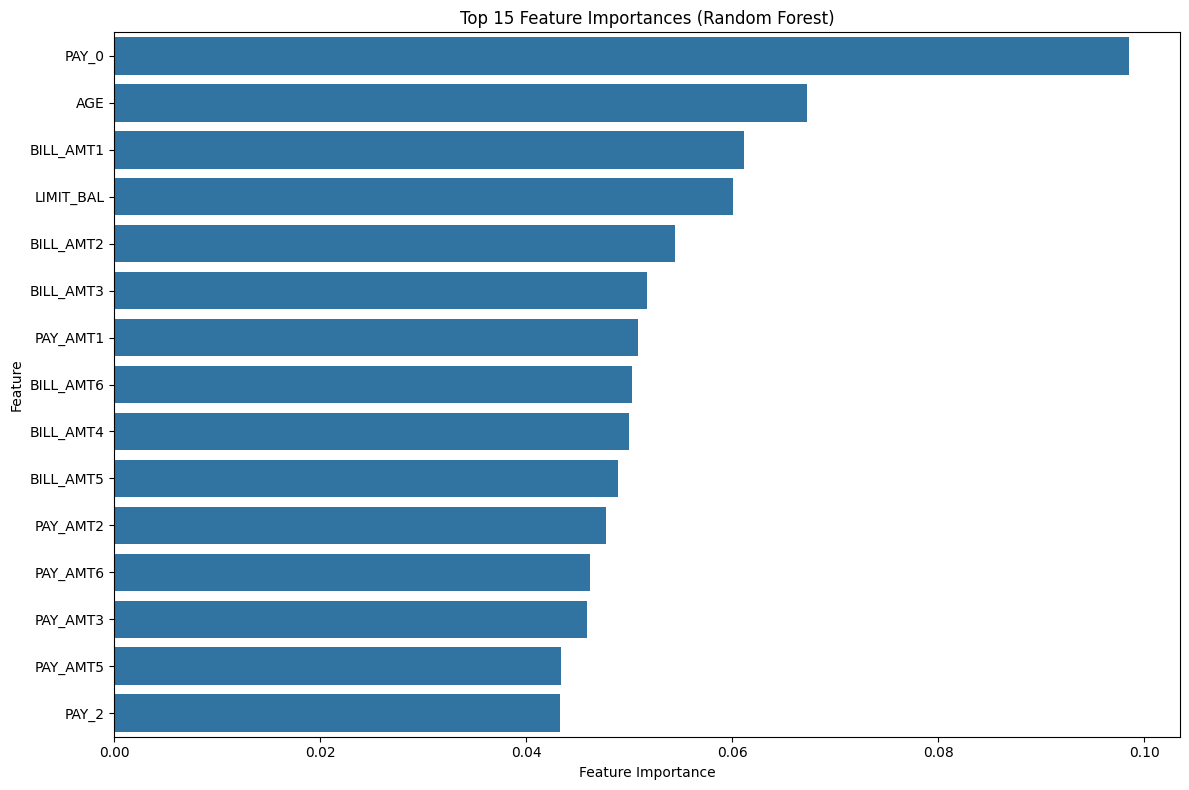


Using selected features for modeling: ['PAY_0', 'AGE', 'BILL_AMT1', 'LIMIT_BAL', 'BILL_AMT2', 'BILL_AMT3']


In [34]:
try:
    rf_importance_model.fit(X, y)
    importances = rf_importance_model.feature_importances_
    feature_names = X.columns
    feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

    print("\nTop 10 Feature Importances:")
    print(feature_importance_df.head(10))

    # Select the top 5 most important features
    top_6_features = feature_importance_df['feature'].head(6).tolist()
    print(f"\nSelected Top 6 Features: {top_6_features}")

    # Plotting Feature Importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Top 15 Feature Importances (Random Forest)")
    plt.tight_layout()
    plt.savefig('top_15_feature_importances.png')
    plt.show()
    plt.close() 

except Exception as e:
    print(f"Error during Feature Importance calculation: {e}")
    print("Please ensure your dataset has enough features and no constant columns after preprocessing.")
    
    top_6_features = [] # Fallback

if not top_6_features:
    print("Could not determine top 5 features. Proceeding with all available features for modeling.")
    X_selected = X
else:
    X_selected = X[top_6_features]
    print(f"\nUsing selected features for modeling: {top_6_features}")

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_selected.columns) # Convert back to DataFrame for consistency

print("\nFirst 5 rows of scaled selected features:")
print(X_scaled_df.head())


First 5 rows of scaled selected features:
      PAY_0       AGE  BILL_AMT1  LIMIT_BAL  BILL_AMT2  BILL_AMT3
0  1.794564 -1.246020  -0.642501  -1.136720  -0.647399  -0.667993
1 -0.874991 -1.029047  -0.659219  -0.365981  -0.666747  -0.639254
2  0.014861 -0.161156  -0.298560  -0.597202  -0.493899  -0.482408
3  0.014861  0.164303  -0.057491  -0.905498  -0.013293   0.032846
4 -0.874991  2.334029  -0.578618  -0.905498  -0.611318  -0.161189


In [36]:
# Split the data into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData split into training and testing sets (20% test size).")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Data split into training and testing sets (20% test size).
X_train shape: (24000, 6), y_train shape: (24000,)
X_test shape: (6000, 6), y_test shape: (6000,)


In [37]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

models = {
    'Logistic Regression': {
        'model': LogisticRegression(solver='liblinear', random_state=42),
        'params': {
            'C': [0.1, 1],
            'penalty': ['l1', 'l2'],
            'class_weight': ['balanced']
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42, n_jobs=-1),
        'params': {
            'n_estimators': [100, 300],
            'max_depth': [10, None],
            'class_weight': ['balanced']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1),
        'params': {
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 300],
            'max_depth': [3, 6],
            'scale_pos_weight': [1, 3]
        }
    }
}

results = {}

for name, cfg in models.items():
    grid = GridSearchCV(cfg['model'], cfg['params'], cv=cv, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

    print(f"\n{name}")
    print("Best Params:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Comparison table
results_df = pd.DataFrame(results).T
print("\n--- Model Comparison ---\n")
print(results_df)



Logistic Regression
Best Params: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1'}
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77      4673
           1       0.37      0.61      0.46      1327

    accuracy                           0.68      6000
   macro avg       0.61      0.66      0.62      6000
weighted avg       0.75      0.68      0.70      6000


Random Forest
Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.48      0.55      0.51      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.77      0.77      6000


XGBoost
Best Params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'scale_pos_weight': 3}
Classific

In [38]:
import pickle
import os
from sklearn.preprocessing import StandardScaler

# Save the XGBoost model
os.makedirs('saved_models', exist_ok=True)
with open('saved_models/xgboost_model.pkl', 'wb') as f:
    pickle.dump(models['XGBoost'], f)

# Save the scaler
with open('saved_models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the top features list
top_features = ['PAY_0', 'AGE', 'BILL_AMT1', 'LIMIT_BAL', 'BILL_AMT2', 'MARRIAGE_2', 'MARRIAGE_3']
with open('saved_models/top_features.pkl', 'wb') as f:
    pickle.dump(top_features, f)

print("Model and preprocessing objects saved successfully")

Model and preprocessing objects saved successfully
